# Problem Statement

    We have to predict the resale price of vehicle referring to the availables details.
    
    Metric 

In [2]:
from platform import python_version
print(python_version())

3.9.7


# Import Dataset & Libraries

In [66]:
from warnings import filterwarnings
filterwarnings ('ignore')
import pandas as pd

In [24]:
df = pd.read_csv('C:/Users/Satyam/Desktop/Data Science/Selfstudy/Project_Vehicle_Price_Prediction/car data.csv')

# Read The Data

In [25]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [27]:
df.shape

(301, 9)

In [41]:
print (df.Seller_Type.unique())
print (df.Transmission.unique())
print (df.Fuel_Type.unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']


# Check for Missing Data

In [29]:
#Check Missing Values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [30]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Drop Unnecessary Columns 

In [31]:
df_cols = list(df.columns)
df_cols.remove('Car_Name')    # Dropping unwanted column
df_cols

['Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

In [32]:
final_df = df[df_cols]
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Create Additional Feature
    Calculaing 'No_Years' column to dataframe using current year & car purchase year.

In [34]:
final_df['Current_Year'] = 2020
final_df.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020


In [35]:
final_df['No_Years']=final_df['Current_Year']-final_df['Year']

In [36]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [37]:
final_df.drop(labels=['Year','Current_Year'], axis=1, inplace=True)

In [39]:
final_df.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7


# Coverting Categorical Columns into Binary

In [42]:
#Converting categorical features using One Hot Encoding(OHE)

final_df = pd.get_dummies(final_df, drop_first=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [52]:
#Check coorelation between features

final_df.corr()['Selling_Price']

Selling_Price             1.000000
Present_Price             0.878983
Kms_Driven                0.029187
Owner                    -0.088344
No_Years                 -0.236141
Fuel_Type_Diesel          0.552339
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Transmission_Manual      -0.367128
Name: Selling_Price, dtype: float64

# Check Coorelation of Continuous Columns

In [47]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
corrmat = final_df.corr()
top_corr_features = corrmat.index
top_corr_features


Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No_Years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

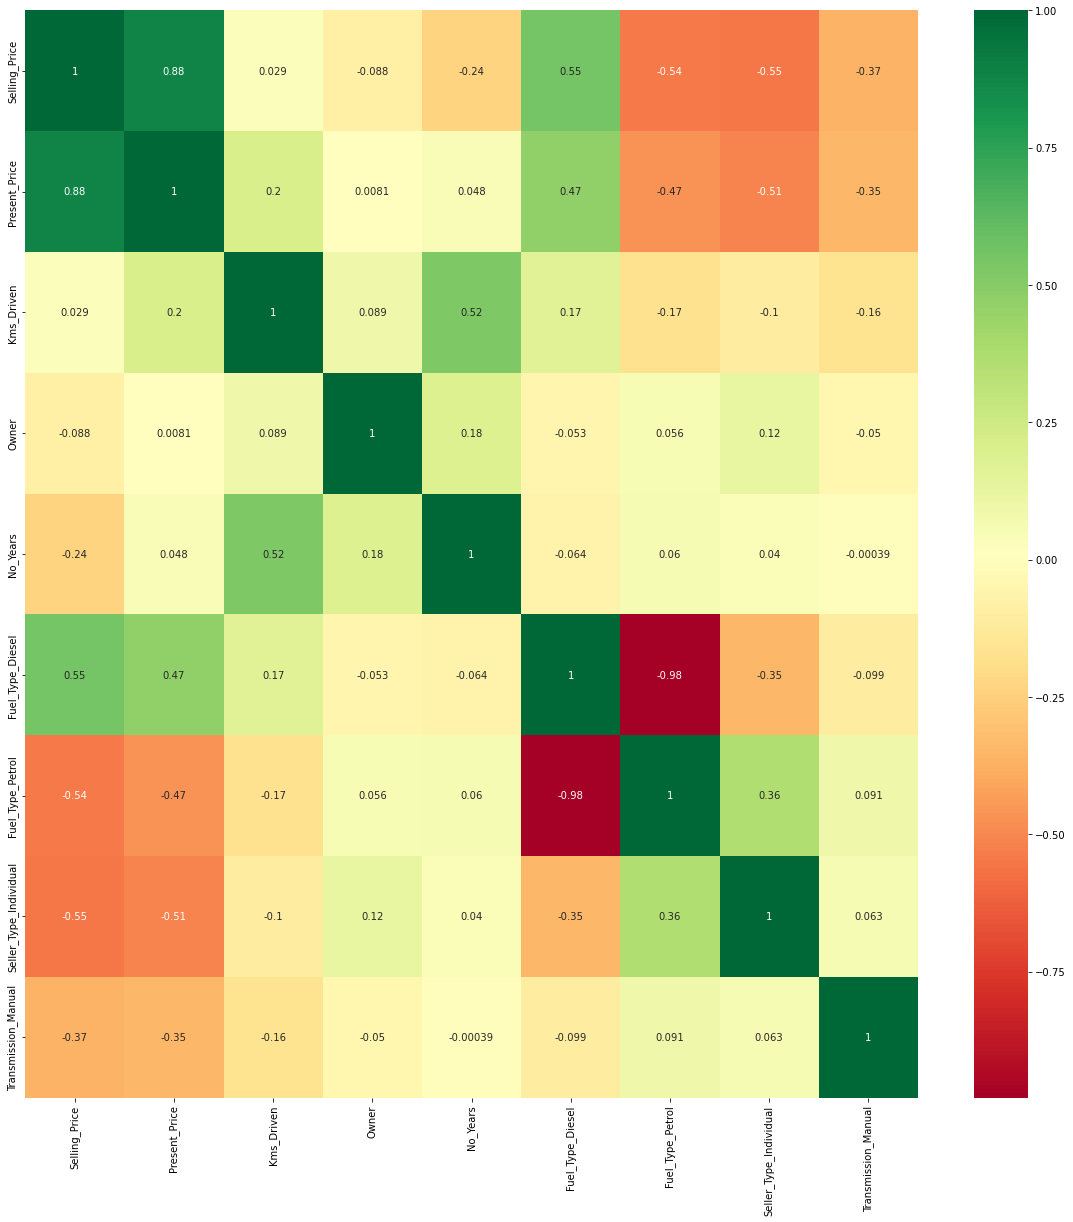

In [51]:
# Plot Heat Map

plt.figure(figsize=(20,20))
g = sn.heatmap(final_df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

# Dividing Datset in Dependent & Independent feature

In [58]:
y = final_df[['Selling_Price']]
x = final_df.drop(labels='Selling_Price', axis=1)

In [61]:
x.head()

,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [62]:
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [67]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [68]:
print(model.feature_importances_)

[0.391722   0.0397265  0.00047272 0.07711339 0.21434474 0.01724681
 0.12468333 0.13469053]


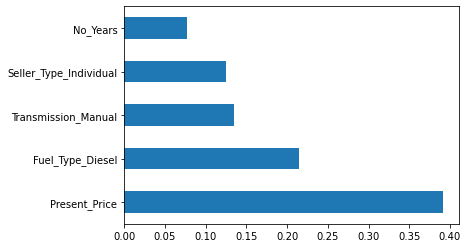

In [69]:
# Plot graph of feature importance for better visualisation

feature_importances = pd.Series(model.feature_importances_, index=x.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.show()

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2, random_state=32)

In [118]:
xtrain.shape

(240, 8)

# Model 1 - Random Forest

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
# Hyperparameters

import numpy as np
#Number of tress in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop=1200, num=12)]

#Number of features to consider as every split
max_features = ['auto','sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num=6)]

#Minimum number of samples required to split a mode
min_samples_split = [2,5,10,15,100]

#Minimum number od samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [121]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [123]:
rf=RandomForestRegressor()

In [124]:
 rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv=5, verbose=2, random_state=42, n_jobs=1 )

In [125]:
rf_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [129]:
model1_prediction_ts = rf_random.predict(xtest)
model1_prediction_tr = rf_random.predict(xtrain)

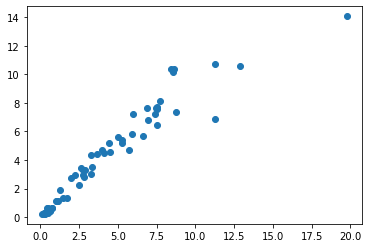

In [127]:
plt.scatter(ytest, model1_prediction_ts)

#Linearly plotted graphs shows minmal difference between predicted & actual values

In [136]:
from sklearn.metrics import mean_absolute_error

model1_tr_err=mean_absolute_error(ytrain, model1_prediction_tr)
model1_ts_err=mean_absolute_error(ytest, model1_prediction_ts)

print('Model1 Training Error: ', model1_tr_err)
print('Model1 Testing Error: ', model1_ts_err)

Model1 Training Error:  0.6482018760258659
Model1 Testing Error:  0.6128812544105082


# Model 2 - Linear Regression

In [132]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()


In [138]:
model_2= lm.fit(xtrain, ytrain)

model2_prediction_tr=model_2.predict(xtrain)
model2_prediction_ts=model_2.predict(xtest)

In [140]:
model2_tr_err=mean_absolute_error(ytrain,model2_prediction_tr)
model2_ts_err=mean_absolute_error(ytest,model2_prediction_ts)

print('Model2 Training Error: ', model2_tr_err)
print('Model2 Testing Error: ', model2_ts_err)


Model2 Training Error:  1.2559787635393056
Model2 Testing Error:  0.921352199985082


# Model 3 - Ridge Regression

In [153]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=10)

In [154]:
model3 = rr.fit(xtrain, ytrain)

model3_prediction_tr= model3.predict(xtrain)
model3_prediction_ts= model3.predict(xtest)

In [155]:
model3_tr_err=mean_absolute_error(ytrain,model3_prediction_tr)
model3_ts_err=mean_absolute_error(ytest,model3_prediction_ts)

print('Model3 Training Error: ', model3_tr_err)
print('Model3 Testing Error: ', model3_ts_err)

Model3 Training Error:  1.2427375203298456
Model3 Testing Error:  0.9303144898594979


In [149]:
w = []
x_cv = 0
for i in range (0,1000):
    w.append(round(x_cv+0.01, 2))
    x_cv += 0.01
    
tg = {'alpha':w}
    
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rr,tg,scoring='neg_mean_absolute_error')
cv_model = cv.fit(xtrain,ytrain)
cv_model.best_params_


{'alpha': 10.0}

In [151]:
model3_cv_prediction_tr= cv_model.predict(xtrain)
model3_cv_prediction_ts= cv_model.predict(xtest)

In [152]:
model3_cv_tr_err=mean_absolute_error(ytrain,model3_cv_prediction_tr)
model3_cv_ts_err=mean_absolute_error(ytest,model3_cv_prediction_ts)

print('Model3 CV Training Error: ', model3_cv_tr_err)
print('Model3 CV Testing Error: ', model3_cv_ts_err)

Model3 CV Training Error:  1.2427375203298456
Model3 CV Testing Error:  0.9303144898594979


# Final Model

In [157]:
#Since we have got lowest error with Random Forest Regressor, we shall create final model with RandomForestRegressor

final_model = rf_random.fit(x,y)
final_model_prediction= final_model.predict(x)
final_model_err = mean_absolute_error(y,final_model_prediction)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

In [160]:
print('Final Model Error: ', round(final_model_err, 3))

Final Model Error:  0.266
